from https://www.kaggle.com/namanmanchanda/rnn-in-pytorch

## Recurrent Neural Networks 

These are a type of neural network designed to work on sequence prediction models.

Can be used for text data, speech data, classification data and generative models.

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%matplotlib inline

## Lets start by creating a sine wave

In [4]:
x = torch.linspace(0,799,800)
y = torch.sin(x*2*3.1416/40)

### Lets plot it

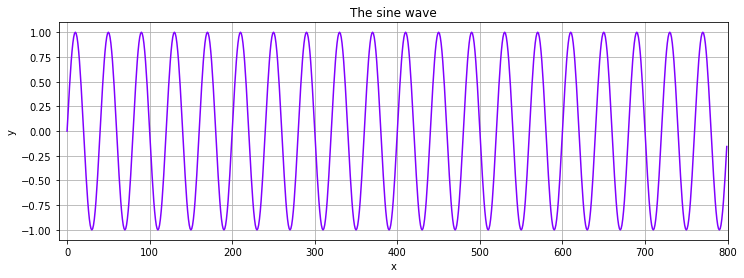

In [5]:
plt.figure(figsize=(12,4))
plt.title('The sine wave')
plt.xlim(-10, 801)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(y.numpy(), color="#8000ff")
plt.show()

### splitting the data into training and testing set

In [6]:
test_size = 40
train_set = y[:-test_size]
test_set = y[-test_size:]

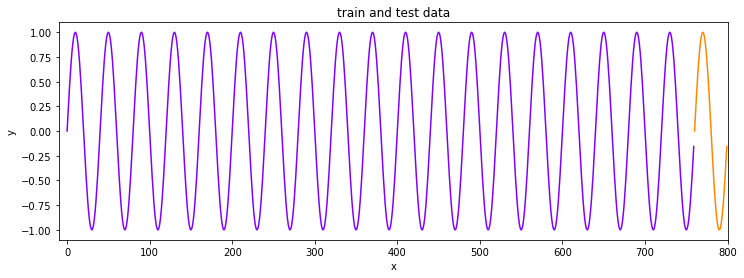

In [7]:
plt.figure(figsize=(12,4))
plt.xlim(-10, 801)
plt.title('train and test data')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(train_set, color="#8000ff")
plt.plot(range(760,800),test_set, color="#ff8800")

### Concept of window sizes in RNN

While working with LSTM models, we divide the training sequence into series of overlapping windows. The label used for comparison is the next value in the sequence.

For example if we have series of of 12 records and a window size of 3, we feed [x1, x2, x3] into the model, and compare the prediction to x4. Then we backdrop, update parameters, and feed [x2, x3, x4] into the model and compare the prediction to x5. To ease this process, I'm defining a function input_data(seq,ws) that created a list of (seq,labels) tuples. If ws is the window size, then the total number of (seq,labels) tuples will be len(series)-ws.

In [8]:
def input_data(seq,ws):
    out = []
    L = len(seq)
    
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window, label))
    
    return out

calling input_data function on our train set

In [9]:
window_size = 40
train_data = input_data(train_set, window_size)
len(train_data)

720

checking the first value of the function

In [10]:
train_data[0]

(tensor([ 0.0000e+00,  1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,
          7.0711e-01,  8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,
          1.0000e+00,  9.8769e-01,  9.5106e-01,  8.9100e-01,  8.0901e-01,
          7.0710e-01,  5.8778e-01,  4.5398e-01,  3.0901e-01,  1.5643e-01,
         -7.2400e-06, -1.5644e-01, -3.0902e-01, -4.5400e-01, -5.8779e-01,
         -7.0711e-01, -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01,
         -1.0000e+00, -9.8769e-01, -9.5105e-01, -8.9100e-01, -8.0901e-01,
         -7.0710e-01, -5.8777e-01, -4.5398e-01, -3.0900e-01, -1.5642e-01]),
 tensor([1.4480e-05]))

## Creating the model

In [31]:
class LSTM(nn.Module):
    def __init__(self, input_size=1,hidden_size=50, output_size=1):
        super(LSTM, self).__init__()
        self.lstm1 = nn.LSTM(input_size, hidden_size)
        self.fc1  = nn.Linear(hidden_size, output_size)
        self.hidden_size = 50
        self.hidden = (torch.zeros(1,1, hidden_size), torch.zeros(1,1, hidden_size))
    
    def forward(self, seq):
        lstm_out, self.hidden = self.lstm1(seq.view(len(seq),1,-1), self.hidden)
        pred = self.fc1(lstm_out.view(len(seq),-1))
        return pred[-1]
        

In [12]:
# x,y = train_data[0]
# x

In [13]:
# print(x.view(len(x),1,-1))
# print(x.view(len(x), -1))

## Model instantiation


In [32]:
torch.manual_seed(42)
model = LSTM()
loss_criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

## Lets train the model and visualise it

Loss for epoch : 0 set: 0.04198753833770752
Performance on test range: 0.5199933648109436


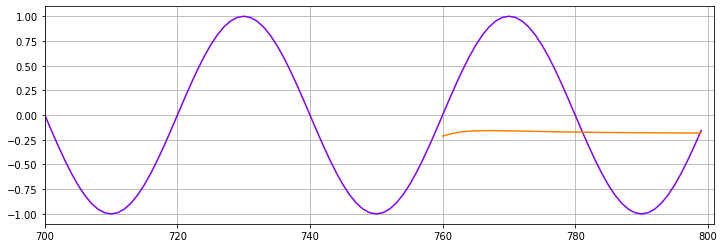

Loss for epoch : 1 set: 0.017851077020168304
Performance on test range: 0.4221653342247009


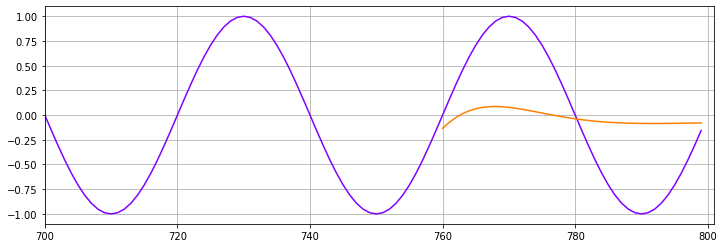

Loss for epoch : 2 set: 0.0028897554147988558
Performance on test range: 0.1663500964641571


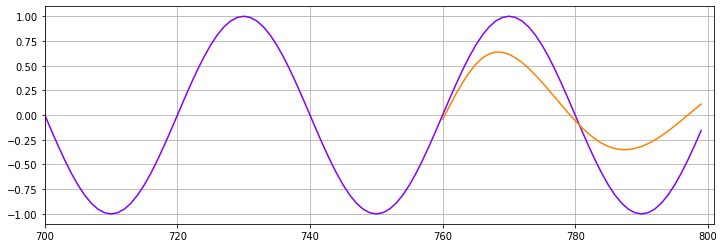

Loss for epoch : 3 set: 0.0003203194937668741
Performance on test range: 0.030567195266485214


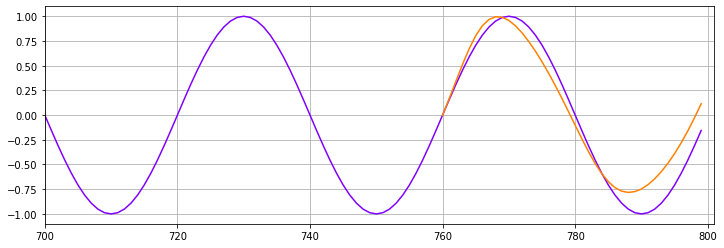

Loss for epoch : 4 set: 0.00012971989053767174
Performance on test range: 0.014989105984568596


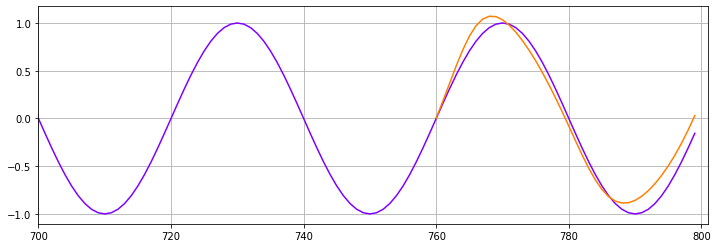

Loss for epoch : 5 set: 0.00012007288751192391
Performance on test range: 0.011854700744152069


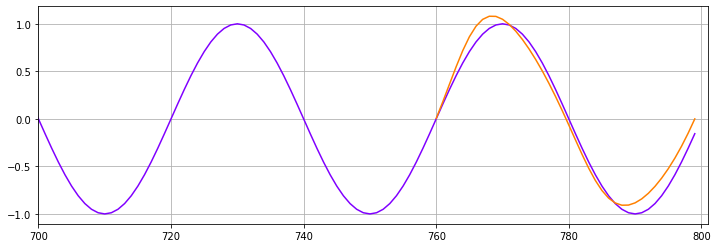

In [37]:
num_epochs = 6
future = 40

for epoch in range(num_epochs):
    for seq, y_train in train_data:
        optimizer.zero_grad()
        
        model.hidden = (torch.zeros(1,1,model.hidden_size), torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        loss = loss_criterion(y_pred, y_train)
        
        loss.backward()
        
        optimizer.step()
    print(f"Loss for epoch : {epoch} set: {loss}" )
    
    preds = train_set[-window_size:].tolist()
    
    for f in range(future):
        seq = torch.FloatTensor(preds[-window_size:])
        with torch.no_grad():
            model.hidden = (torch.zeros(1,1,model.hidden_size), torch.zeros(1,1,model.hidden_size))
            preds.append(model(seq))
        
    loss= loss_criterion(torch.tensor(preds[-window_size:]), y[760:])
    print(f"Performance on test range: {loss}")
    
    plt.figure(figsize=(12,4))
    plt.xlim(700, 801)
    plt.grid(True)
    plt.plot(y, color="#8000ff")
    plt.plot(range(760,800), preds[window_size:], color="#ff8000")
    plt.show()
        